In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv("orders.csv")
prior = pd.read_csv("order_products__prior.csv")
train = pd.read_csv("order_products__train.csv")
products = pd.read_csv("products.csv")
aisle = pd.read_csv("aisles.csv")
department = pd.read_csv("departments.csv")

In [3]:
neworder=orders.drop(orders[orders['eval_set'] == 'test'].index,axis=0)
neworder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3346083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 204.2+ MB


In [4]:
data = pd.merge(neworder,prior,on=["order_id"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 10 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_id              int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 2.7+ GB


In [5]:
total= pd.concat([train,prior])
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 1.3 GB


In [6]:
data = pd.merge(neworder,total,on=["order_id"])
data

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
33819101,272231,206209,train,14,6,14,30.0,40603,4,0
33819102,272231,206209,train,14,6,14,30.0,15655,5,0
33819103,272231,206209,train,14,6,14,30.0,42606,6,0
33819104,272231,206209,train,14,6,14,30.0,37966,7,0


In [7]:
data.shape

(33819106, 10)

In [8]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [22]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

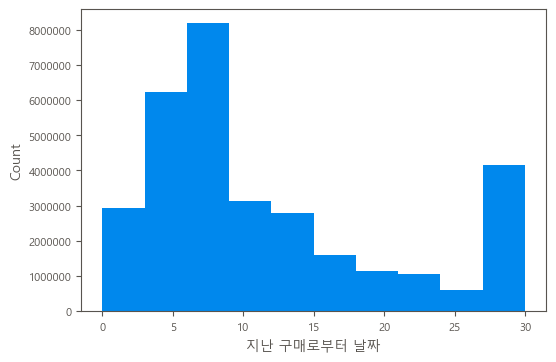

In [33]:
plt.hist(data['days_since_prior_order'])
plt.xlabel('지난 구매로부터 날짜')
plt.ylabel('Count')
plt.show()

## 이탈/비이탈 고객 구분

In [10]:
mean_prior = data.groupby('user_id')['days_since_prior_order'].mean().round()
mean_prior

user_id
1         19.0
2         18.0
3         11.0
4         15.0
5         12.0
          ... 
206205    15.0
206206     4.0
206207    15.0
206208     7.0
206209    21.0
Name: days_since_prior_order, Length: 206209, dtype: float64

In [11]:
mean_prior=pd.DataFrame(mean_prior)
mean_prior['days_since_prior_order']=np.where(mean_prior['days_since_prior_order']>=15,True,False)

In [12]:
mean_prior['days_since_prior_order'].apply(lambda x:x==True).value_counts()

True     107987
False     98222
Name: days_since_prior_order, dtype: int64

In [13]:
mean_prior.rename(columns={'days_since_prior_order':'churn'},inplace=True)
mean_prior

,churn
user_id,
1,True
2,True
3,False
4,True
5,False
...,...
206205,True
206206,False
206207,True


In [14]:
p1=pd.merge(mean_prior,data,on='user_id')
p1

,user_id,churn,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1,True,2539329,prior,1,2,8,NaN,196,1,0
1,1,True,2539329,prior,1,2,8,NaN,14084,2,0
2,1,True,2539329,prior,1,2,8,NaN,12427,3,0
3,1,True,2539329,prior,1,2,8,NaN,26088,4,0
4,1,True,2539329,prior,1,2,8,NaN,26405,5,0
...,...,...,...,...,...,...,...,...,...,...,...
33819101,206209,True,272231,train,14,6,14,30.0,40603,4,0
33819102,206209,True,272231,train,14,6,14,30.0,15655,5,0
33819103,206209,True,272231,train,14,6,14,30.0,42606,6,0
33819104,206209,True,272231,train,14,6,14,30.0,37966,7,0


In [15]:
#이탈자 그룹
df=p1[p1['churn']==True]
df.head()

,user_id,churn,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1,True,2539329,prior,1,2,8,NaN,196,1,0
1,1,True,2539329,prior,1,2,8,NaN,14084,2,0
2,1,True,2539329,prior,1,2,8,NaN,12427,3,0
3,1,True,2539329,prior,1,2,8,NaN,26088,4,0
4,1,True,2539329,prior,1,2,8,NaN,26405,5,0


In [16]:
#비이탈자
df2=p1[p1['churn']==False]
df2.head()

,user_id,churn,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
296,3,False,1374495,prior,1,1,14,NaN,9387,1,0
297,3,False,1374495,prior,1,1,14,NaN,17668,2,0
298,3,False,1374495,prior,1,1,14,NaN,15143,3,0
299,3,False,1374495,prior,1,1,14,NaN,16797,4,0
300,3,False,1374495,prior,1,1,14,NaN,39190,5,0


In [17]:
df=pd.merge(df,products,on='product_id')
df.head()

,user_id,churn,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,True,2539329,prior,1,2,8,NaN,196,1,0,Soda,77,7
1,1,True,2398795,prior,2,3,7,15.0,196,1,1,Soda,77,7
2,1,True,473747,prior,3,3,12,21.0,196,1,1,Soda,77,7
3,1,True,2254736,prior,4,4,7,29.0,196,1,1,Soda,77,7
4,1,True,431534,prior,5,4,15,28.0,196,1,1,Soda,77,7


In [18]:
df2=pd.merge(df2,products,on='product_id')
df2.head()

,user_id,churn,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,3,False,1374495,prior,1,1,14,NaN,9387,1,0,Granny Smith Apples,24,4
1,3,False,2037211,prior,4,2,18,20.0,9387,3,1,Granny Smith Apples,24,4
2,3,False,2710558,prior,5,0,17,12.0,9387,2,1,Granny Smith Apples,24,4
3,3,False,1972919,prior,6,0,16,7.0,9387,3,1,Granny Smith Apples,24,4
4,3,False,1839752,prior,7,0,15,7.0,9387,9,1,Granny Smith Apples,24,4


In [ ]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html()

In [ ]:
import sweetviz as sv
report = sv.analyze(df2)
report.show_html()

## 이탈/비이탈 구매주기 비교

Text(0.5, 1.0, '이탈고객 구매주기')

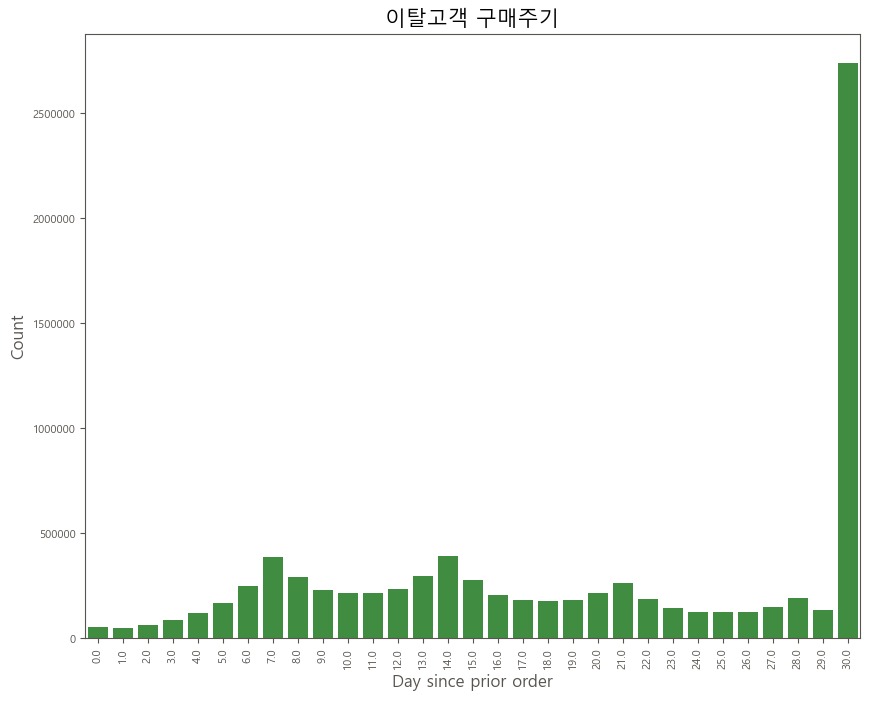

In [32]:
grouped = df.loc[df['days_since_prior_order'].notnull()]

plt.figure(figsize=(10, 8))
sns.countplot(x=grouped.days_since_prior_order, data=grouped, alpha= 0.8, color = 'green')
plt.xticks(rotation='vertical')
plt.xlabel('Day since prior order', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('이탈고객 구매주기', fontsize=15)

Text(0.5, 1.0, '비이탈고객 구매주기')

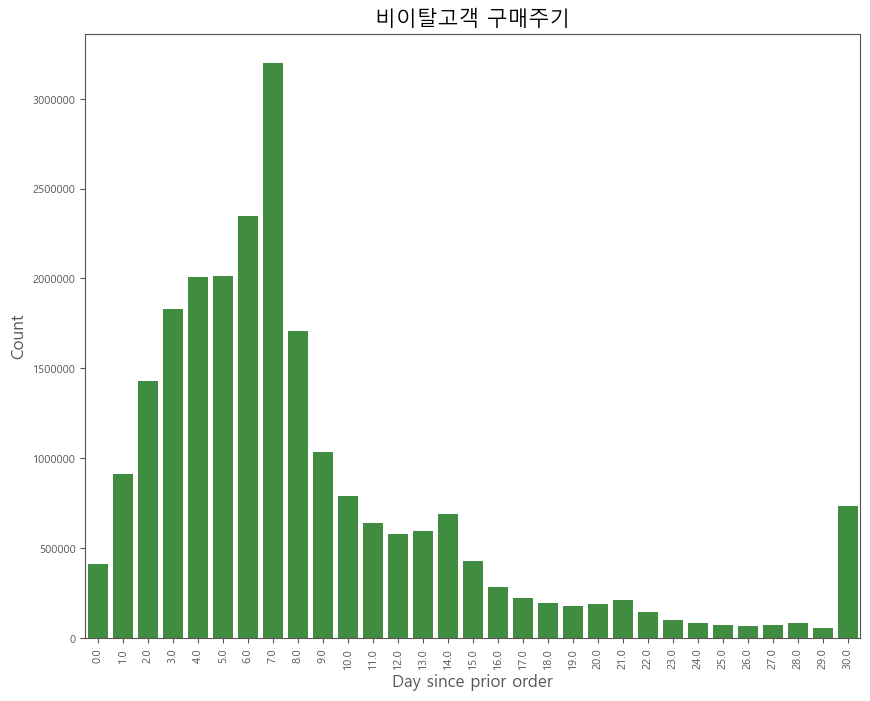

In [34]:
grouped = df2.loc[df2['days_since_prior_order'].notnull()]

plt.figure(figsize=(10, 8))
sns.countplot(x=grouped.days_since_prior_order, data=grouped, alpha= 0.8, color = 'green')
plt.xticks(rotation='vertical')
plt.xlabel('Day since prior order', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('비이탈고객 구매주기', fontsize=15)

## 상품 별 구매비교

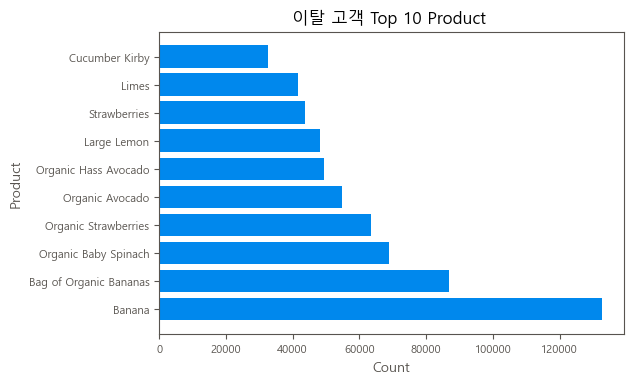

In [23]:
plt.barh(df['product_name'].value_counts().head(10).index, df['product_name'].value_counts().head(10).values)
plt.title('이탈 고객 Top 10 Product ')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

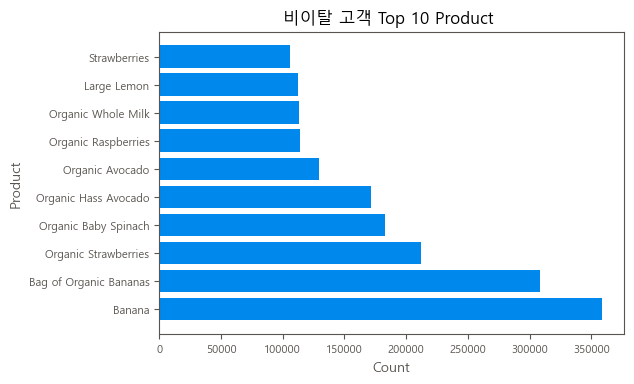

In [24]:
plt.barh(df2['product_name'].value_counts().head(10).index, df2['product_name'].value_counts().head(10).values)
plt.title('비이탈 고객 Top 10 Product ')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

## 인기상품  구매비율 비교

In [25]:
df['product_name'].value_counts(normalize=True).head(10)*100

Banana                    1.398181
Bag of Organic Bananas    0.913571
Organic Baby Spinach      0.726790
Organic Strawberries      0.670033
Organic Avocado           0.576705
Organic Hass Avocado      0.521992
Large Lemon               0.508306
Strawberries              0.460188
Limes                     0.437842
Cucumber Kirby            0.344588
Name: product_name, dtype: float64

In [26]:
df2['product_name'].value_counts(normalize=True).head(10)*100

Banana                    1.473974
Bag of Organic Bananas    1.266947
Organic Strawberries      0.871358
Organic Baby Spinach      0.751088
Organic Hass Avocado      0.704269
Organic Avocado           0.532260
Organic Raspberries       0.468908
Organic Whole Milk        0.464239
Large Lemon               0.462628
Strawberries              0.434758
Name: product_name, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9491330 entries, 0 to 9491329
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   churn                   bool   
 2   order_id                int64  
 3   eval_set                object 
 4   order_number            int64  
 5   order_dow               int64  
 6   order_hour_of_day       int64  
 7   days_since_prior_order  float64
 8   product_id              int64  
 9   add_to_cart_order       int64  
 10  reordered               int64  
 11  product_name            object 
 12  aisle_id                int64  
 13  department_id           int64  
dtypes: bool(1), float64(1), int64(10), object(2)
memory usage: 1022.8+ MB


## 구매시간 비교

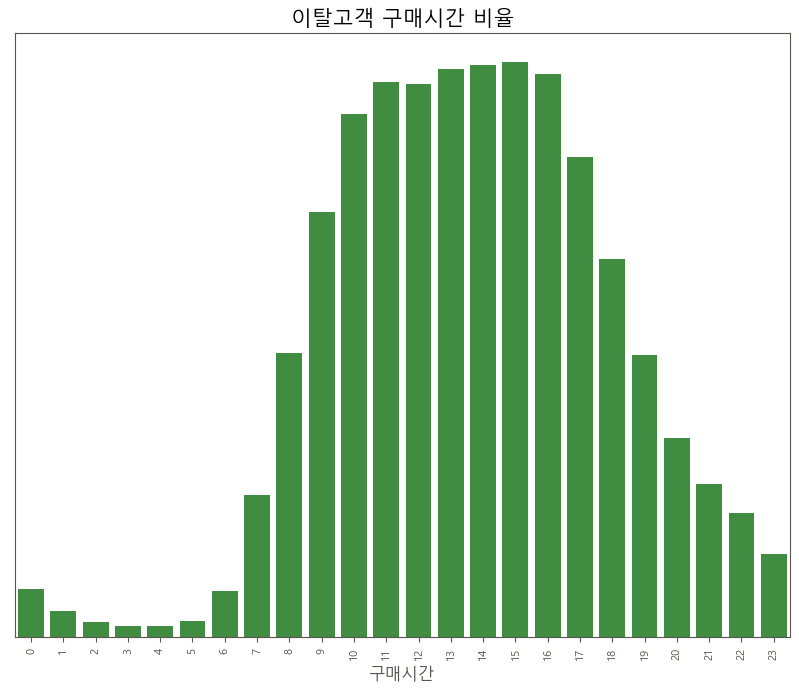

In [28]:
grouped = df.loc[df['order_hour_of_day'].notnull()]

total_counts = grouped['order_hour_of_day'].count()
hourly_counts = df['order_hour_of_day'].value_counts()
hourly_ratios = hourly_counts / total_counts


plt.figure(figsize=(10, 8))
sns.barplot(x=hourly_ratios.index, y=hourly_ratios.values, color='green', alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('구매시간', fontsize=12)
plt.gca().axes.yaxis.set_visible(False)
plt.ylabel('이탈고객 비율', fontsize=12)
plt.title('이탈고객 구매시간 비율', fontsize=15)
plt.show()

In [29]:
hourly_ratios

15    0.086601
14    0.086161
13    0.085584
16    0.084798
11    0.083668
12    0.083366
10    0.078763
17    0.072301
9     0.064061
18    0.056975
8     0.042775
19    0.042490
20    0.030086
21    0.023045
7     0.021420
22    0.018809
23    0.012509
0     0.007304
6     0.006931
1     0.004014
5     0.002492
2     0.002325
3     0.001801
4     0.001721
Name: order_hour_of_day, dtype: float64

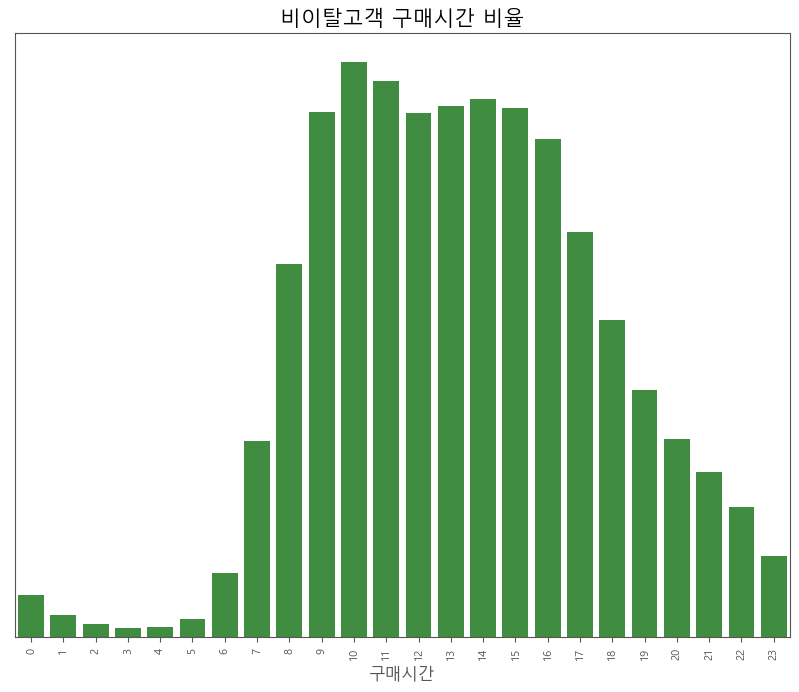

In [30]:
grouped = df2.loc[df2['order_hour_of_day'].notnull()]

total_counts = grouped['order_hour_of_day'].count()
hourly_counts = df2['order_hour_of_day'].value_counts()
hourly_ratios = hourly_counts / total_counts


plt.figure(figsize=(10, 8))
sns.barplot(x=hourly_ratios.index, y=hourly_ratios.values, color='green', alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('구매시간', fontsize=12)
plt.ylabel('비이탈고객 비율', fontsize=12)
plt.gca().axes.yaxis.set_visible(False)
plt.title('비이탈고객 구매시간 비율', fontsize=15)
plt.show()

In [31]:
hourly_ratios

10    0.087445
11    0.084619
14    0.081928
13    0.080802
15    0.080516
9     0.079849
12    0.079800
16    0.075751
17    0.061665
8     0.056781
18    0.048244
19    0.037582
20    0.030106
7     0.029799
21    0.025175
22    0.019876
23    0.012367
6     0.009736
0     0.006524
1     0.003425
5     0.002806
2     0.002080
4     0.001619
3     0.001507
Name: order_hour_of_day, dtype: float64